## Chapter 2

### Exercise 2.1: Another ball dropped from a tower

A ball is again dropped from a tower of height $h$ with an initial velocity zero. Write a program that asks the user to enter the heigh in meters of the tower and then calculates and prints the time the ball takes until it hits the ground, ignoring air resistance. Use your program to calculate the time for a ball dropped from a 100m high tower.

#### Answer to Exercise 2.1:

In [1]:
from math import sqrt

a = 9.81 # earth gravity
h = float(input("Enter the height of the tower (in meters): ")) # asks the user to input the height of the building

# ensures that the input is non-negative 
while h < 0: # used a while loop so that it will ask again the user without requiring the program to run again
    print("You have entered a negative value. Try again with h > 0")
    h = float(input("Enter the height of the tower (in meters): "))

t = sqrt(2*h / a) # formula for time
print("The ball will take ", t, " second(s) to fall to the ground.") # prints the output

Enter the height of the tower (in meters):  100


The ball will take  4.515236409857309  second(s) to fall to the ground.


### Exercise 2.2: Altitude of a sattelite

A sattelite is to be launched into a circular orbit around the Earth so that it orbits the planet once every $T$ seconds.

1. Show that the altitude $h$ above the Earth's surface that the sattelite must have is $$h = \left( \frac{GMT^2}{4\pi^2} \right) ^ \frac{1}{3} - R,$$ where $G = 6.67 \times 10^{-11} \ \mathrm{m}^3 \mathrm{kg}^{-1}\mathrm{s}^2$ is Newton's gravitational constant, $M = 5.97 \times 10^{24} \ \mathrm{kg}$ is the mass of the Earth, and $R = 6371 \ \mathrm{km}$ is its radius.
2. Write a program that asks the user to enter the desired value of $T$ and then calculates and prints out the correct altitude in meters.
3. Use your program to calculate the altitudes of satellites that orbit the Earth once a day (so-called "geosynchronous" orbit), once every 90 minutes, and once every 45 minutes. What do you conclude from the last of these calculations?
4. Technically a geosynchronous sattelite is one that orbits the Earth once per _sidereal day_, which is 23.93 hours, not 24 hours. Why is this? And how much difference will it make to the altitude of the satellite?

#### Answer to Excercise 2.2:

1. In orbit, the only force in effect is gravity. An object orbiting at a distance L away from the center (of gravity) has a centripetal force of $\frac{mv^2}{r}$. Since gravity is the only force, this must be equal to the centripetal force
$$\frac{mv^2}{r} = \frac{GMm}{r^2}.$$
We can simplify this further to the following
$$r = \frac{GM}{v^2}$$
Since we are given the period $T$, we find the velocity $v = 2\pi r/T$. This yields the following
$$r^3 = \frac{GMT^2}{4\pi^2}$$
$$r = \left( \frac{GMT^2}{4\pi^2} \right)^\frac{1}{3}$$
We subtract the Earths radius $R$ to the orbital radius to find the height.
$$h = \left( \frac{GMT^2}{4\pi^2} \right) ^ \frac{1}{3} - R$$

2. We can implement this to code by doing the following

In [2]:
import math

G = 6.67 * 10**(-11) # gravitational constant
M = 5.91 * 10**(24) #kg - mass
R = 6371 * 1000 #m - earth radius

t = float(input("Enter the desired period T (in hours): ")) # asks for user input

T = t*3600 # converts to seconds

while T < 0 :
    print("Input a non-negative value")
    T = float(input("Enter the desired period T (in seconds): "))

first_term = G*M*T*T / (4*math.pi*math.pi) # computes for the first term

h = math.pow(first_term, 1/3) - R # finds height of satellite
h_km = h / 1000 # converts to km for easier readability

print(f"A satellite with a period {t} hours has an altitude of {h_km:.2f} kilometers") # used f-strings and 2 decimal places for easier readabiltiy

Enter the desired period T (in hours):  1.5


A satellite with a period 1.5 hours has an altitude of 256.97 kilometers


In [3]:
import math as m
import numpy as np

N = np.array([45, 90])

T = N*60 # converts to seconds

def h(T): # used a function so i can use arrays
    first_term = G*M*T*T / (4*m.pi*m.pi) # computes for the first term
    
    h = np.power(first_term, 1/3) - R # finds height of satellite
    h_km = h / 1000 # converts to km for easier readability
    return h_km

result_array = np.zeros(len(N)) # empty list which i can input the results in from the function

for i in range(len(N)): # prints the altitude for each period as listed on the array N
  result_array[i] = h(T[i])
  print(f"Period: {N[i]} hours        Altitude: {result_array[i]:.2f} kilometers") # used f-strings and 2 decimal places for easier readabiltiy


Period: 45 hours        Altitude: -2195.64 kilometers
Period: 90 hours        Altitude: 256.97 kilometers


3. For the satellite to orbit in 45 minutes, it should have an altitude of -2195.64 km. This means it should orbit below the Earth's surface, which is impossible.

In [4]:
import math as m
import numpy as np

N = np.array([23.93, 24])

T = N*3600 # converts to seconds

for i in range(len(N)): # prints the altitude for each period as listed on the array N
  result_array[i] = h(T[i])
  print(f"Period: {N[i]} hours        Altitude: {result_array[i]:.2f} kilometers") # used f-strings and 2 decimal places for easier readabiltiy

difference = result_array[1] - result_array[0] # subtracts the array

print(f"The difference between the two periods is {difference:.2f} kilometers")

Period: 23.93 hours        Altitude: 35632.10 kilometers
Period: 24.0 hours        Altitude: 35713.97 kilometers
The difference between the two periods is 81.87 kilometers


4. A geosynchronus satellite orbits every 23.93 hours since it is the period of orbit in which the satellite returns to its orignal position one full rotation relative to distant stars. The solar day is with respect to the sun, with an extra degree to ensure that the same location is pointed to the sun after a full rotation. For the satellite to be at the same position it must orbit with respect to Earth's rotation relative to the stars.

### Exercise 2.3

Write a program to perform the inverse operation to that of Example 2.2. That is, ask the user for the Cartesian coordinates $x, y$ of a point in two-dimensional space, and calculate and print the corresponding polar coordinates, with the angle $\theta$ given in degrees.

#### Answer to Exercise 2.3:

In [11]:
import math as m

# asks for the x and y coordinates
x = float(input("x coordinate: "))
y = float(input("y coordinate: "))

# calculates for the polar coordinates 
r = m.sqrt(x*x + y*y) # gets the distance from the pole/origin
theta = m.atan2(y, x) * 180 / m.pi # using atan2 instead of atan so that the range would be -pi to pi. also considers the sign of the cartesian coordinates and converts to deg

if theta < 0: 
    theta = 360 + theta # converts range from [-180, 180] to [0, 360)

print(f"The polar coordinates are: ({r}, {theta}°)")

x coordinate:  -1
y coordinate:  0


The polar coordinates are: (1.0, 180.0°)


### Exercise 2.4

A spaceship travels from Earth in a straight line at relativistic speed $v$ to another planet $x$ light years away. Write a program to ask the user for the value of $x$ and the speed $v$ as a fraction of the speed of light $c$, then print out the time (in years) that the spaceship takes to reach its destination (a) in the rest frame of an observer on Earth and (b) as perceived by a passenger on board the ship. Use your program to calculate the answers for a planet 10 light years away with $v = 0.99c$.

#### Answer to Exercise 2.4:

In [14]:
import math as m

c = 1 # speed of light

# asks for user input for the distance from the planet and speed of spaceship
x = float(input("Distance from planet in light-years: ")) 
v = float(input("Speed of spaceship as a fraction of c: "))

lorentz_factor = 1 / m.sqrt(1 - (v*v)) # only used v*v here since v is already a fraction of c

t_earth = x / v # time for ship to arrive from Earth's perspective (rest)

t_spaceship = t_earth / lorentz_factor # calculates the time it takes for the ship to arrive at the planet, as perceived inside the ship

print(f"Viewing from Earth, It will take {t_earth:.2f} years for the ship to arrive at the planet")
print(f"Viewing from inside the spaceship, It will take {t_spaceship:.2f} years for the ship to arrive at the planet")

Distance from planet in light-years:  10
Speed of spaceship as a fraction of c:  0.99


Viewing from Earth, It will take 10.10 years for the ship to arrive at the planet
Viewing from inside the spaceship, It will take 1.42 years for the ship to arrive at the planet


### Excercise 2.5: Quantum potential step

A well-known quantum mechanics problem involves a particle of mass $m$ that encounters a one-dimensional potential step, like this:
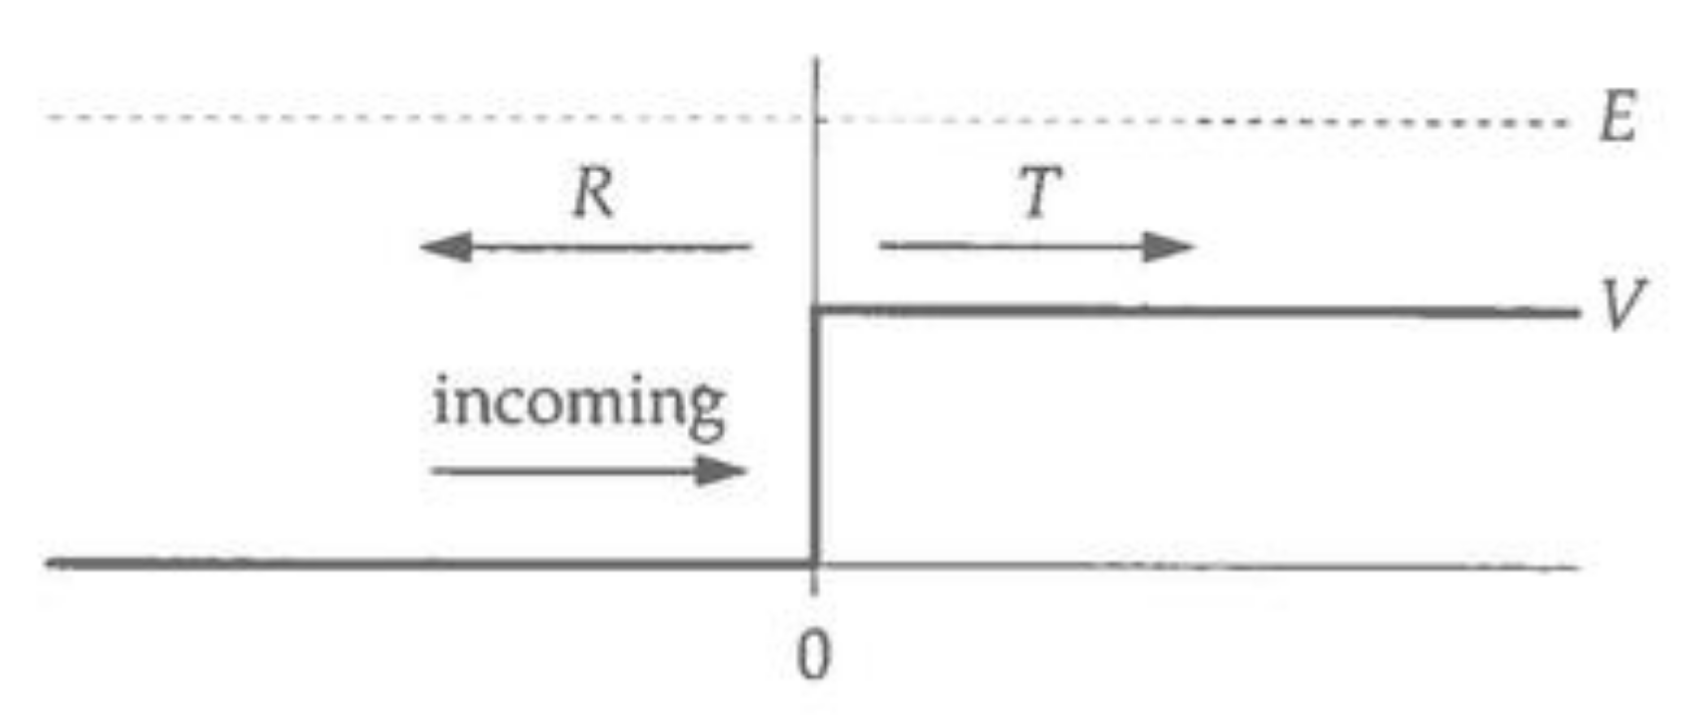

The particle with initial kinetic energy $E$ and wavevector $k_1 = \sqrt{2mE}/\hbar$ enters from the left and encounters a sudden jump in potential energy of height $V$ at position $x = 0$. By solving the Schrödinger equation, one can show that when $E > V$ the particle may either 1. pass the step, in which case it has a lower kinetic energy of $E - V$ on the other side and a correspondingly smaller wavevector of $k_2 = \sqrt{2m(E-V)}/\hbar$, or 2. it may be reflected, keeping all of its kinetic energy and an unchanged wavevector but moving in the opposite direction. The probabilities $T$ and $R$ for transmission and reflection are given by

$$T = \frac{4k_1k_2}{(k_1 + k_2)^2}, \quad R = \left(\frac{k_1 - k_2}{k_1 + k_2}\right)^2.$$

Suppose we have a particle with mass equal to the electron mass $m = 9.11 \times 10^{-31}$ kg and energy 10 eV encountering a potential step of height 9 eV. Write a Python program to compute and print out the transmission and reflection probabilities using the formulas above.

#### Answer to Exercise 2.5:

In [38]:
import numpy as np

m = 9.11e-31 # mass of particle
h_bar = 1.054571817e-34 # joule-seconds
E = 10 # kinetic energy eV
V = 9 # potential energy eV

J = 1.60218e-19 # eV to Joules

# converts eV potentials to joules
E = E * J
V = V * J

k_1 = np.sqrt(2 * m * E) / h_bar
k_2 = np.sqrt(2 * m * (E - V)) / h_bar

T = (4 * k_1 * k_2) / ((k_1 + k_2)**2) * 100 # multiplied by 100 to show percentage
R = ((k_1 - k_2) / (k_1 + k_2))**2 * 100

print(f"Probability of")
print(f"Transmission: {T:.2f}%")
print(f"Reflection: {R:.2f}%")
print(f"Sanity check (total): {T + R:.2f}%")

Probability of
Transmission: 73.01%
Reflection: 26.99%
Sanity check (total): 100.00%


### Exercise 2.6: Planetary orbits

The orbit in space of one body around another, such as a planet around the Sun, need not be circular. In general it takes the form of an ellipse, with the body sometimes closer in and sometimes further out. If you are given the distance $\ell_1$ of closest approach that a planet makes to the Sun, also called its *perihelion*, and its linear velocity $v_1$ at perihelion, then any other property of the orbit can be calculated from these two as follows.

1. Kepler's second law tells us that the distance $\ell_2$ and velocity $v_2$ of the planet at its most distant point, or *aphelion*, satisfy $\ell_2 v_2 = \ell_1 v_1$. At the same time the total energy, kinetic plus gravitational, of a planet with velocity $v$ and distance $r$ from the Sun is given by
$$E = \frac{1}{2}mv^2 - G\frac{mM}{r},$$

   where $m$ is the planet's mass, $M = 1.9891 \times 10^{30}$ kg is the mass of the Sun, and $G = 6.6738 \times 10^{-11} \ \mathrm{m}^3 \mathrm{kg}^{-1} \mathrm{s}^{-2}$ is Newton's gravitational constant. Given that energy must be conserved, show that $v_2$ is the smaller root of the quadratic equation
   $$v_2^2 - \frac{2GM}{v_1 \ell_1} v_2 - \left( v_1^2 - \frac{2GM}{\ell_1} \right) = 0.$$

   Once we have $v_2$ we can calculate $\ell_2$ using the relation $\ell_2 = \ell_1 v_1 / v_2$.

2. Given the values of $v_1$, $\ell_1$, and $\ell_2$, other parameters of the orbit are given by simple formulas can that be derived from Kepler's laws and the fact that the orbit is an ellipse:

   Semi-major axis: $a = \frac{1}{2}(\ell_1 + \ell_2)$,
   
   Semi-minor axis: $b = \sqrt{\ell_1 \ell_2}$,
   
   Orbital period: $T = \frac{2\pi ab}{\ell_1 v_1}$,
   
   Orbital eccentricity: $e = \frac{\ell_2 - \ell_1}{\ell_2 + \ell_1}$.

   Write a program that asks the user to enter the distance to the Sun and velocity at perihelion, then calculates and prints the quantities $\ell_2$, $v_2$, $T$, and $e$.

3. Test your program by having it calculate the properties of the orbits of the Earth (for which $\ell_1 = 1.4710 \times 10^{11}$ m and $v_1 = 3.0287 \times 10^4 \ \mathrm{m s}^{-1}$) and Halley's comet ($\ell_1 = 8.7830 \times 10^{10}$ m and $v_1 = 5.4529 \times 10^4 \ \mathrm{m s}^{-1}$). Among other things, you should find that the orbital period of the Earth is one year and that of Halley's comet is about 76 years.

#### Answer to Exercise 2.6:

1. Since energy is conserved, we have

$$\begin{align}
    E_1 &= E_2 \\ \\
    \frac{1}{2}mv_1^2 - G\frac{mM}{l_1} &= \frac{1}{2}mv_2^2 - G\frac{mM}{l_2} \\\\
    mv_2^2 - 2G\frac{mM}{l_2} &- \left( mv_1^2 - 2G\frac{mM}{l_1} \right) = 0 \\\\
    v_2^2 - \frac{2GM}{\ell_1 v_1}v_2 &- \left( v_1^2 - \frac{2GM}{l_1} \right) = 0 \quad \blacksquare
\end{align}$$


2. The quantities $\ell_2$, $v_2$, $T$, and $e$ are computed as follows

In [38]:
import math as m
import numpy as np
import pandas as pd

# physical constants
G = 6.6738e-11 # m3 kg-1 s-2
M = 1.9891e30 # kg

# print(f"Input the following values at perihelion")
v_1 = float(input("Velocity [m/s]: "))
l_1 = float(input("Distance [m]: "))

# v_1 = 3.0287e4
# l_1 = 1.4710e11

#--------------------------------------------------------

# setting up quadratic formula
b = -(2 * G * M) / (l_1 * v_1)
c = -(v_1 * v_1) + ((2 * G * M) / l_1)
            
# solves for v_2 using the quadratic formula
v_2 = (-b - m.sqrt(b*b - 4*c))/2

# computes l_2
l_2 = l_1 * v_1 / v_2

#--------------------------------------------------------

# computing semi major/minor axis
axis_a = (l_1 + l_2)/2
axis_b = m.sqrt(l_1*l_2)

# orbital period
T = (2*m.pi*axis_a*axis_b) / (l_1*v_1)
T = T * 3.17098e-8

# orbital eccentricity
e = (l_2 - l_1) / (l_2 + l_1)

#--------------------------------------------------------

# displays values using a table
df = pd.DataFrame({
    "Values": [v_2, l_2, T, e],
    }, 
    index = ["Velocity at Aphelion [m/s]", "Distance at Aphelion [m]", "Period [s]", "Eccentricity"])

# uses scientific notation
df.style.format("{:.5e}")

Velocity [m/s]:  3.0287e4
Distance [m]:  1.4710e11


,Values
Velocity at Aphelion [m/s],2.93054e+04
Distance at Aphelion [m],1.52027e+11
Period [s],1.00022e+00
Eccentricity,1.64719e-02


3. We can use an array to compare both as shown below.

In [42]:
import math as m
import numpy as np
import pandas as pd

# physical constants
G = 6.6738e-11 # m3 kg-1 s-2
M = 1.9891e30 # kg

# [Earth, Halley]
v_1 = np.array([3.0287e4, 5.4529e4])
l_1 = np.array([1.4710e11, 8.7830e10])

#--------------------------------------------------------

# we defined a function so we can use the array
def f(v_1, l_1):
    # setting up quadratic formula
    b = -(2 * G * M) / (l_1 * v_1)
    c = -(v_1 * v_1) + ((2 * G * M) / l_1)
                
    # solves for v_2 using the quadratic formula
    v_2 = (-b - m.sqrt(b*b - 4*c))/2
    
    # computes l_2
    l_2 = l_1 * v_1 / v_2
    
    # computing semi major/minor axis
    axis_a = (l_1 + l_2)/2
    axis_b = m.sqrt(l_1*l_2)
    
    # orbital period
    T = (2*m.pi*axis_a*axis_b) / (l_1*v_1)
    T = T * 3.17098e-8
    
    # orbital eccentricity
    e = (l_2 - l_1) / (l_2 + l_1)

    result_array = [v_1, l_1, v_2, l_2, T, e]
    return(result_array)

#--------------------------------------------------------

# creates a variable to store values. 2 arrays of length 6
final_array = np.zeros((2,6))

# stores the values for each planet
for i in range(len(v_1)):
    final_array[i] = f(v_1[i], l_1[i])

# displays values using a table
df = pd.DataFrame({
    "Earth": final_array[0],
    "Halley's Comet": final_array[1] 
    }, 
    index = ["v_1 [m/s]",
    "l_1 [m/s]",
    "v_2 [m/s]",
    "l_2 [m/s]",
    "Period [yrs]",
    "Eccentricity"])

# uses scientific notation
df.style.format("{:.6e}")

,Earth,Halley's Comet
v_1 [m/s],3.028700e+04,5.452900e+04
l_1 [m/s],1.471000e+11,8.783000e+10
v_2 [m/s],2.930540e+04,9.066807e+02
l_2 [m/s],1.520272e+11,5.282215e+12
Period [yrs],1.000224e+00,7.608172e+01
Eccentricity,1.647191e-02,9.672889e-01


### Exercise 2.7: Catalan numbers

The Catalan numbers $C_n$ are a sequence of integers $1, 1, 2, 5, 14, 42, 132, \dots$ that play an important role in quantum mechanics and the theory of disordered systems. (They were central to Eugene Wigner’s proof of the so-called semicircle law.) They are given by

$$
C_0 = 1, \qquad
C_{n+1} = \frac{4n + 2}{n + 2}\, C_n.
$$

Write a program that prints in increasing order all Catalan numbers less than or equal to one billion.

#### Answer to Exercise 2.7:

In [65]:
C = 1
n = 0

while C <= 1e9:
    print(int(C))
    C = C * (4*n + 2) / (n + 2)
    n += 1

1
1
2
5
14
42
132
429
1430
4862
16796
58786
208012
742900
2674440
9694845
35357670
129644790
477638700


### Exercise 2.8:

### Exercise 2.9: The Madelung constant

In condensed matter physics the Madelung constant gives the total electric potential felt by an atom in a solid. It depends on the charges on the other atoms nearby and their locations. Consider, for instance, solid sodium chloride—table salt. The sodium chloride crystal has atoms arranged on a cubic lattice, but with alternating sodium and chlorine atoms, the sodium ones having a single positive charge $+e$ and the chlorine ones a single negative charge $-e$, where $e$ is the charge on the electron. If we label each position on the lattice by three integer coordinates $(i,j,k)$, then the sodium atoms fall at positions where $i+j+k$ is even, and the chlorine atoms at positions where $i+j+k$ is odd.

Consider a sodium atom at the origin, $i=j=k=0$, and let us calculate the Madelung constant. If the spacing of atoms on the lattice is $a$, then the distance from the origin to the atom at position $(i,j,k)$ is

$$
\sqrt{(ia)^2 + (ja)^2 + (ka)^2} = a \sqrt{i^2 + j^2 + k^2},
$$

and the potential at the origin created by such an atom is

$$
V(i,j,k) = \pm \frac{e}{4 \pi \epsilon_0 a \sqrt{i^2 + j^2 + k^2}},
$$

with $\epsilon_0$ being the permittivity of the vacuum and the sign of the expression depending on whether $i+j+k$ is even or odd. The total potential felt by the sodium atom is then the sum of this quantity over all other atoms. Let us assume a cubic box around the sodium at the origin, with $L$ atoms in all directions. Then

$$
V_\text{total} = \sum_{\substack{i,j,k=-L \\ \text{not } i=j=k=0}}^L V(i,j,k) = \frac{e}{4 \pi \epsilon_0 a} M,
$$

where $M$ is the Madelung constant, at least approximately—technically the Madelung constant is the value of $M$ when $L \to \infty$, but one can get a good approximation just by using a large value of $L$.

Write a program to calculate and print the Madelung constant for sodium chloride. Use as large a value of $L$ as you can, while still having your program run in reasonable time—say in a minute or less.

#### Answer to Exercise 2.9:

In [35]:
import math as m

# m is just the sum of ijk, we can ignore e/4pie_oa as this can be factored out and cancelled
L = 100
M = 0

for i in range(-L,L+1): # L + 1 since range is not inclusive upto L + 1 (-L to L only)
    for j in range(-L,L+1):
        for k in range(-L,L+1):
            if i == j == k == 0: # excludes i = j = k = 0 from the summation range
                continue
            else:
                if (i + j + k) % 2 == 0: # adds to M if even, subtracts if odd
                    M += 1/m.sqrt(i*i + j*j + k*k)
                else:
                    M -= 1/m.sqrt(i*i + j*j + k*k)
print(M)

-1.7418198158396654


In [36]:
# this is same as aboved but optimized
import math as m

L = 200
M = 0

for i in range(-L,L+1): 
    i_sq = i*i
    for j in range(-L,L+1):
        ij_sq = i_sq + j*j
        for k in range(-L,L+1):
            ijk_sq = ij_sq + k*k
            if i == j == k == 0: 
                continue 
            else:
                l = m.sqrt(ijk_sq)
                if (i + j + k) % 2 == 0:
                    M += 1/l
                else:
                    M -= 1/l
print(M)

-1.7446850421707383


### Exercise 2.10: The semi-empirical mass formula

In nuclear physics, the semi-empirical mass formula is a formula for calculating the approximate nuclear binding energy $B$ of an atomic nucleus with atomic number $Z$ and mass number $A$:

$$
B = a_1 A - a_2 A^{2/3} - a_3 \frac{Z^2}{A^{1/3}} - a_4 \frac{(A-2Z)^2}{A} + \frac{a_5}{A^{1/2}},
$$

where, in units of millions of electron volts, the constants are $a_1 = 15.8$, $a_2 = 18.3$, $a_3 = 0.714$, $a_4 = 23.2$, and

$$
a_5 =
\begin{cases}
0 & \text{if $A$ is odd},\\[2mm]
12.0 & \text{if $A$ and $Z$ are both even},\\[1mm]
-12.0 & \text{if $A$ is even and $Z$ is odd}.
\end{cases}
$$

1. Write a program that takes as its input the values of $A$ and $Z$, and prints out the binding energy for the corresponding atom. Use your program to find the binding energy of an atom with $A = 58$ and $Z = 28$. (Hint: The correct answer is around 500 MeV.)

2. Modify your program to print out not the total binding energy $B$, but the binding energy per nucleon, which is $B/A$.

3. Now modify your program so that it takes as input just a single value of the atomic number $Z$ and then goes through all values of $A$ from $A=Z$ to $A=3Z$, to find the one that has the largest binding energy per nucleon. This is the most stable nucleus with the given atomic number. Have your program print out the value of $A$ for this most stable nucleus and the value of the binding energy per nucleon.

4. Modify your program again so that, instead of taking $Z$ as input, it runs through all values of $Z$ from 1 to 100 and prints out the most stable value of $A$ for each one. At what value of $Z$ does the maximum binding energy per nucleon occur? (The true answer, in real life, is $Z = 28$, which is nickel.)

#### Answer to Exercise 2.10:

### Exercise 2.11: Binomial coefficients

The binomial coefficient $\binom{n}{k}$ is an integer equal to

$$\binom{n}{k} = \frac{n!}{k!(n-k)!} = \frac{n \times (n-1) \times (n-2) \times \ldots \times (n-k+1)}{1 \times 2 \times \ldots \times k}$$

when $k \geq 1$, or $\binom{n}{0} = 1$ when $k = 0$.

1. Using this form for the binomial coefficient, write a Python user-defined function `binomial(n,k)` that calculates the binomial coefficient for given $n$ and $k$. Make sure your function returns the answer in the form of an integer (not a float) and gives the correct value of 1 for the case where $k = 0$.

2. Using your function write a program to print out the first 20 lines of "Pascal's triangle." The $n$th line of Pascal's triangle contains $n + 1$ numbers, which are the coefficients $\binom{n}{0}$, $\binom{n}{1}$, and so on up to $\binom{n}{n}$. Thus the first few lines are
```
   1 1
   1 2 1
   1 3 3 1
   1 4 6 4 1
```

3. The probability that an unbiased coin, tossed $n$ times, will come up heads $k$ times is $\binom{n}{k}/2^n$. Write a program to calculate (a) the total probability that a coin tossed 100 times comes up heads exactly 60 times, and (b) the probability that it comes up heads 60 or more times.

#### Answer to Exercise 2.11:

### Exercise 2.12: Prime numbers

The program in Example 2.8 is not a very efficient way of calculating prime numbers: it checks each number to see if it is divisible by any number less than it. We can develop a much faster program for prime numbers by making use of the following observations:

1. A number $n$ is prime if it has no prime factors less than $n$. Hence we only need to check if it is divisible by other primes.

2. If a number $n$ is non-prime, having a factor $r$, then $n = rs$, where $s$ is also a factor. If $r \geq \sqrt{n}$ then $n = rs \geq \sqrt{rs}$, which implies that $s \leq \sqrt{n}$. In other words, any non-prime must have factors, and hence also prime factors, less than or equal to $\sqrt{n}$. Thus to determine if a number is prime we have to check its prime factors only up to and including $\sqrt{n}$ - if there are none then the number is prime.

3. If we find even a single prime factor less than $\sqrt{n}$ then we know that the number is non-prime, and hence there is no need to check any further - we can abandon this number and move on to something else.

Write a Python program that finds all the primes up to ten thousand. Create a list to store the primes, which starts out with just the one prime number 2 in it. Then for each number $n$ from 3 to 10 000 check whether the number is divisible by any of the primes in the list up to and including $\sqrt{n}$. As soon as you find a single prime factor you can stop checking the rest of them - you know $n$ is not a prime. If you find no prime factors $\sqrt{n}$ or less then $n$ is prime and you should add it to the list. You can print out the list all in one go at the end of the program, or you can print out the individual numbers as you find them.

#### Answer to Exercise 2.12:

### Exercise 2.13: Recursion

A useful feature of user-defined functions is *recursion*, the ability of a function to call itself. For example, consider the following definition of the factorial $n!$ of a positive integer $n$:

$$n! = \begin{cases} 1 & \text{if } n = 1, \\ n \times (n-1)! & \text{if } n > 1. \end{cases}$$

This constitutes a complete definition of the factorial which allows us to calculate the value of $n!$ for any positive integer. We can employ this definition directly to create a Python function for factorials, like this:

```python
def factorial(n):
    if n==1:
        return 1
    else:
        return n*factorial(n-1)
```

Note how, if $n$ is not equal to 1, the function calls itself to calculate the factorial of $n - 1$. This is recursion. If we now say "`print(factorial(5))`" the computer will correctly print the answer 120.

1. We encountered the Catalan numbers $C_n$ previously in Exercise 2.7 on page 46. With just a little rearrangement, the definition given there can be rewritten in the form

$$C_n = \begin{cases} 1 & \text{if } n = 0, \\ \frac{4n-2}{n+1} C_{n-1} & \text{if } n > 0. \end{cases}$$

   Write a Python function, using recursion, that calculates $C_n$. Use your function to calculate and print $C_{100}$.

2. Euclid showed that the greatest common divisor $g(m, n)$ of two nonnegative integers $m$ and $n$ satisfies

$$g(m,n) = \begin{cases} m & \text{if } n = 0, \\ g(n, m \text{ mod } n) & \text{if } n > 0. \end{cases}$$

   Write a Python function `g(m,n)` that employs recursion to calculate the greatest common divisor of $m$ and $n$ using this formula. Use your function to calculate and print the greatest common divisor of 108 and 192.

Comparing the calculation of the Catalan numbers in part (a) above with that of Exercise 2.7, we see that it's possible to do the calculation two ways, either directly or using recursion. In most cases, if a quantity can be calculated *without* recursion, then it will be faster to do so, and we normally recommend taking this route if possible. There are some calculations, however, that are essentially impossible (or at least much more difficult) without recursion. We will see some examples later in this book.

#### Answer to Exercise 2.13:

In [43]:
def catalan(n):
    if n == 0:
        return 1
    else:
        return int(catalan(n-1) * (4*n - 2) / (n + 1)) # uses recursion

# asks for user input
c_n = float(input("n-th Catalan number: "))

# ensures that the input is natural numbers only
while (c_n <= 0) or (c_n % 1 != 0): 
    print("Input natural numbers only")
    c_n = float(input("n-th Catalan number: "))

print(catalan(c_n-1)) # starts at 1 instead of 0

n-th Catalan number:  15


2674440
